In [1]:
! pip install tensorflow keras

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import io
import requests

In [3]:
# Load the data


data1 = pd.read_csv('input.csv',na_values='.')
                    
data2= pd.read_csv('output.csv',na_values='.')

# Extract the input features and target variables
X = data1.values
y = data2.values

print (data1.size)
print (data2.size)



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.01, random_state=42)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


11500000
300000


In [4]:

# Reshape the input data for LSTM (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [5]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(3))  # Output layer with 3 neurons for ClosePrice0, HighPrice0, and LowPrice0

# Compile the model
model.compile(optimizer='adam', loss='mse')

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with EarlyStopping callback
model.fit(X_train_reshaped, y_train, epochs=data2.size, batch_size=32, validation_data=(X_test_reshaped, y_test), callbacks=[early_stopping])

Epoch 1/300000
3094/3094 [==============================] - 21s 6ms/step - loss: 0.0072 - val_loss: 0.0016
Epoch 2/300000
3094/3094 [==============================] - 13s 4ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 3/300000
3094/3094 [==============================] - 17s 5ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 4/300000
3094/3094 [==============================] - 16s 5ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 5/300000
3094/3094 [==============================] - 15s 5ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 6/300000
3094/3094 [==============================] - 19s 6ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 7/300000
3094/3094 [==============================] - 16s 5ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 8/300000
3094/3094 [==============================] - 15s 5ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 9/300000
3094/3094 [==============================] - 18s 6ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 10/300000
3094/3094 [==========

In [7]:
model.save("trained_model.h5")

32/32 [==============================] - 1s 3ms/step


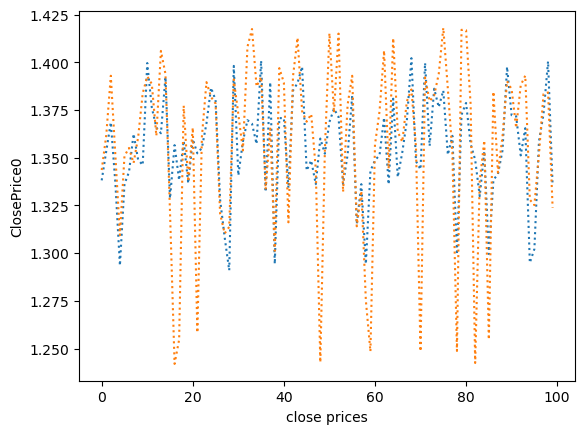

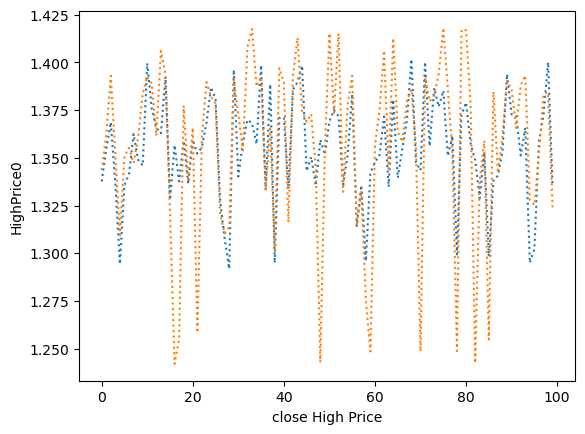

In [8]:
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("trained_model.h5")
# Predict on the entire test set
predictions = model.predict(X_test_reshaped)

# Extract the ClosePrice0 values
real_close_prices = y_test[:100, 0]
predicted_close_prices = predictions[:100, 0]

# Plot the predicted and real values

plt.plot(predicted_close_prices, label='Predicted Close Price', linestyle = 'dotted')
plt.plot(real_close_prices, label='Real ClosePrice', linestyle = 'dotted')
plt.xlabel('close prices')
plt.ylabel('ClosePrice0')

plt.show()
# Extract the High Price values
real_high_prices = y_test[:100, 1]
predicted_high_prices = predictions[:100, 1]
# Plot the predicted and real values

plt.plot(predicted_high_prices, label='Predicted High Price ', linestyle = 'dotted')
plt.plot(real_high_prices, label='Real High Price', linestyle = 'dotted')
plt.xlabel('close High Price')
plt.ylabel('HighPrice0')

plt.show()